# Instituto Tecnológico de Santo Domingo
## Aplicaciones de los Métodos de Optimización Cuasi-Newton en Aprendizaje Profundo

Considerar un problema de optimizacion no restringido con la funcion multimodal de Himmelblau de 2 dimensiones $f(x)$: $\mathbb{R}$ → $\mathbb{R}$

\begin{equation}
\begin{aligned}
\min_{x} \quad & (x_1^2 + x_2 - 11)^2  + (x_1 + x_2^2 - 7)^2\\
\end{aligned}
\end{equation}

Gradiente de $f(x)$:

$$\nabla f(x) =\begin{bmatrix}
2 x_1 + 4x_1 (x_1^2 + x_2 - 11) + 2x_2^2 - 14\\
2x_2 + 4x_2 (x_2^2 + x_1 - 7)+ 2x_1^2 - 22\\
\end{bmatrix}$$

Existen 9 posibles resultados de minimos, entre los cuales se encuentran:
$$ x=[3, 2]$$
$$ x=[3.39, 0.07]$$
$$ x=[-2.81, 3.13]$$
$$ x=[3.58, -1.84]$$
$$ x=[-3.07, -0.08]$$

In [1]:
import numpy as np
import numpy.linalg as ln
import scipy as sp
import scipy.optimize

# Funcion objetivo
def f(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2 # funcion objetivo

# Gradiente de funcion objetivo
def f1(x):
    return np.array([2*x[0] + 4*x[0] * (x[0]**2 + x[1] - 11) + 2*x[1]**2 - 14,
                    2*x[1] + 4*x[1] * (x[1]**2 + x[0] - 7) + 2*x[0]**2 - 22]) # gradiente de la funcion


<Figure size 432x288 with 0 Axes>

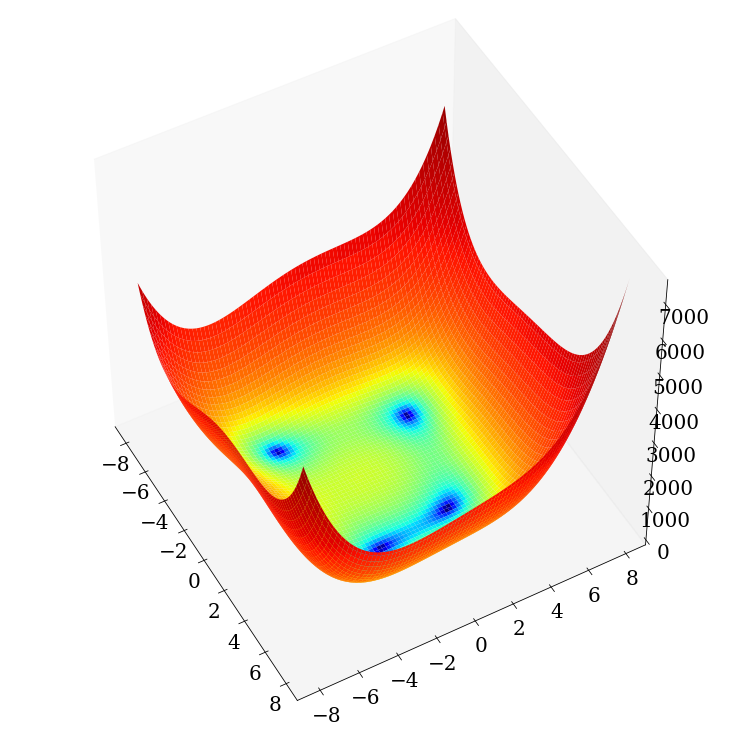

In [105]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
fig, axes = plt.subplots(1, 1, sharey=True, figsize=(10, 10))
ax = Axes3D(fig, azim = -29, elev = 49)
X = np.arange(-8, 8, 0.1)
Y = np.arange(-8, 8, 0.1)
X, Y = np.meshgrid(X, Y)
Z = (X*X+Y-11)**2 + (X+Y*Y-7)**2
ax.plot_surface(X, Y, Z, rstride = 2, cstride = 2, norm = LogNorm(), cmap = cm.jet)
# ax.set_title('Función de Himmelblau', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
# Hide grid lines
plt.axis('on')
ax.grid(b=None)

# axes.contourf(X, Y, Z, levels=1000, cmap = cm.jet)
# # plt.title('Gráfico de contorno', fontsize=35)

# axes.tick_params(axis='both', which='major', labelsize=20)
# axes.tick_params(axis='both', which='minor', labelsize=20)

# plt.xlabel("x")
# plt.ylabel("y")
# plt.show()

### Metodo BFGS

In [17]:
'''
    Referencias: https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm
    https://habr.com/ru/post/333356/

Consultado el PseudoCodigo del Metodo:
- CG, BFGS and SR1 4.1 Project descriptions - UCI Canvas
'''

def metodo_bfgs(f, fprime, x0, 
                maxiter=1000, epsi=10e-3):
    """
    Minimizar una función f usando el algoritmo BFGS.
    
    Parámetros
    ----------
    f : f(x)
        Función a minimizar.
    x0 : ndarray
        Estimación inicial.
    fprime : fprime(x)
        El gradiente de `func`.
    """

    # valores iniciales
    k = 0
    gfk = fprime(x0)
    N = len(x0)
    # Matriz de identidad para inicializar h_k
    I = np.eye(N, dtype=int)
    Hk = I
    xk = x0
    xk_vect = [xk]
    alpha_k_list = []
    while ln.norm(gfk) > epsi and k < maxiter: #Criterios de convergencia
        
        # pk - Direccion de busqueda
        pk = -np.dot(Hk, gfk)
        
        # Estrategia utilizada: Busqueda de linea
        # Búsqueda de línea para las condiciones de Wolfe
        line_search = sp.optimize.line_search(f, f1, xk, pk, maxiter=500)
        #alpha_k - Tamaño del paso
        alpha_k = line_search[0]
        #alpha_k = 0.05
        
        xkp1 = xk + alpha_k * pk
        sk = xkp1 - xk
        xk = xkp1
        
        gfkp1 = fprime(xkp1)
        yk = gfkp1 - gfk
        gfk = gfkp1
        
        k += 1
        
        ro = 1.0 / (np.dot(yk, sk))
        A1 = I - ro * sk[:, np.newaxis] * yk[np.newaxis, :]
        A2 = I - ro * yk[:, np.newaxis] * sk[np.newaxis, :]
        Hk = np.dot(A1, np.dot(Hk, A2)) + (ro * sk[:, np.newaxis] *
                                                sk[np.newaxis, :]) #H_{k+1}
        alpha_k_list.append(alpha_k) # Guardar listado de alphas usados
        xk_vect.append(xk)# Guardar listado de puntos obtenidos para el grafico

    return (xk_vect, k, alpha_k_list[-5:], ln.norm(gfk)) #retornar ultimos 5 alphas

punto_inicial = np.array([1.80, -3.36])
result_bfgs, k_bfgs, alpha_k_bfgs, norma_bfgs = metodo_bfgs(f, f1, punto_inicial, maxiter=5000)

print('Resultado del metodo BFGS:')
print('Resultado final (minimizacion): %s' % (result_bfgs[-1]))
print('Conteo de iteraciones: %s' % (k_bfgs))
print('Ultimos 5 valores de alpha_k optimos que satisfacen condiciones Wolfe: %s' % (alpha_k_bfgs))
print('Norma obtenida en BFGS: %s' % (norma_bfgs))

Resultado del metodo BFGS:
Resultado final (minimizacion): [3.0000129  1.99989823]
Conteo de iteraciones: 8
Ultimos 5 valores de alpha_k optimos que satisfacen condiciones Wolfe: [0.55533583416922, 0.4127526911544688, 1.0, 1.0, 1.0]
Norma obtenida en BFGS: 0.0033796967810424505


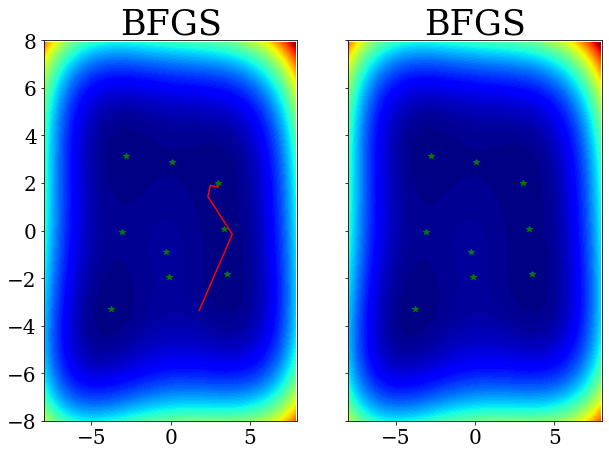

In [81]:
# gráfico de contorno lleno para la función objetivo 2d y mostrar los óptimos
from numpy import arange, meshgrid
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def return_appropriate_result_column(list_of_lists):
    '''
    Funcion que retorna una lista de listas segun puntos resultado del metodo.
    '''
    xvect = [row[0] for row in list_of_lists]
    yvect = [row[1] for row in list_of_lists]
    return [xvect, yvect]

# definir el rango del input
r_min, r_max = -8.0, 8.0
# rango de entrada de muestra uniformemente en incrementos de 0.1
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# crear una malla a partir del eje
x, y = meshgrid(xaxis, yaxis)
# computar objetivos
results = f([x, y])

# definir set de pasos tomados para llegar al optimo
optima_x = return_appropriate_result_column(result_bfgs)

method = 'BFGS'
fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,7))
for ax, zord in zip(axes, [1,-1]):
    # crear un gráfico de contorno lleno con 100 niveles y un esquema de color jet
    ax.contourf(x, y, results, levels=100, cmap='jet')
    ax.autoscale(False) # Para evitar que cambios de límite    
    ax.plot(optima_x[0], optima_x[1], zorder=zord, color='red')
    ax.plot(3, 2, '*', color='green') # Punto de optimos 1
    ax.plot(3.3851, 0.0738, '*', color='green') # Punto de optimos 2
    ax.plot(-3.0730, -0.0813, '*', color='green') # Punto de optimos 3
    ax.plot(-0.2708, -0.9230, '*', color='green') # Punto de optimos 4
    ax.plot(-0.1279, -1.9537, '*', color='green') # Punto de optimos 5
    ax.plot(0.0866, 2.8842, '*', color='green') # Punto de optimos 6
    ax.plot(3.5844, -1.8481, '*', color='green') # Punto de optimos 7
    ax.plot(-2.8051, 3.1313, '*', color='green') # Punto de optimos 8
    ax.plot(-3.7793, -3.2831, '*', color='green') # Punto de optimos 9
    ax.set_title('Método {0}'.format(method), fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    ax.set_xlim(r_min, r_max)
    ax.set_ylim(r_min, r_max)

### Metodo SR1

In [53]:
'''
Consultado el PseudoCodigo del Metodo: 
- CG, BFGS and SR1 4.1 Project descriptions - UCI Canvas
'''

def metodo_sr1(f, fprime, x0,
               maxiter=None, epsi=10e-3):
    '''
    Implementacion del metodo cuasi-Newton SR1 (Symmetric Rank 1)
    '''

    # valores iniciales
    k = 0
    gfk = fprime(x0)
    N = len(x0)
    # matriz de identidad para inicializar p_k
    I = np.eye(N, dtype=int) 
    Hk = I # Inicializar Hk con la matriz identidad de tamaño N
    xk = x0
    alpha_k_list = []
    xk_vect = [xk]
    while ln.norm(gfk) > epsi and k < maxiter: #Criterios de convergencia
        
        # pk - Direccion de busqueda
        pk = -np.dot(Hk, gfk)
        
        #LINE SEARCH
        # Constantes de búsqueda de línea para las condiciones de Wolfe.
        line_search = sp.optimize.line_search(f, f1, xk, pk, maxiter=500)
        # alpha_k - Tamaño del paso
        alpha_k = line_search[0]
        #alpha_k = 0.025 
        
        xkp1 = xk + alpha_k * pk
        sk = xkp1 - xk
        xk = xkp1
        
        gfkp1 = fprime(xkp1)
        yk = gfkp1 - gfk
        gfk = gfkp1
        
        k += 1

        A1 = np.dot(Hk, yk) - sk
        Hk = Hk - (np.dot(A1[:, np.newaxis], A1[np.newaxis, :])/np.dot(A1[np.newaxis, :], yk))
        alpha_k_list.append(alpha_k) # Guardar listado de alphas usados
        xk_vect.append(xk) # Guardar listado de puntos obtenidos para el grafico

    return (xk_vect, k, alpha_k_list[-5:], ln.norm(gfk))

punto_inicial = np.array([1.80, -3.36])
result_sr1, k_sr1, alpha_k_sr1, norma_sr1 = metodo_sr1(f, f1, punto_inicial, maxiter=5000)

print('Resultado del metodo SR1:')
print('Resultado final (minimizacion): %s' % (result_sr1[-1]))
print('Conteo de iteraciones: %s' % (k_sr1))
print('Ultimos 5 valores de alpha_k optimos que satisfacen condiciones Wolfe: %s' % (alpha_k_sr1))
print('Norma obtenida en SR1: %s' % (norma_sr1))

Resultado del metodo SR1:
Resultado final (minimizacion): [3.00000363 1.99999372]
Conteo de iteraciones: 9
Ultimos 5 valores de alpha_k optimos que satisfacen condiciones Wolfe: [1.0, 1.0, 0.15975092214104447, 1.0, 1.0]
Norma obtenida en SR1: 0.00020071217851455465


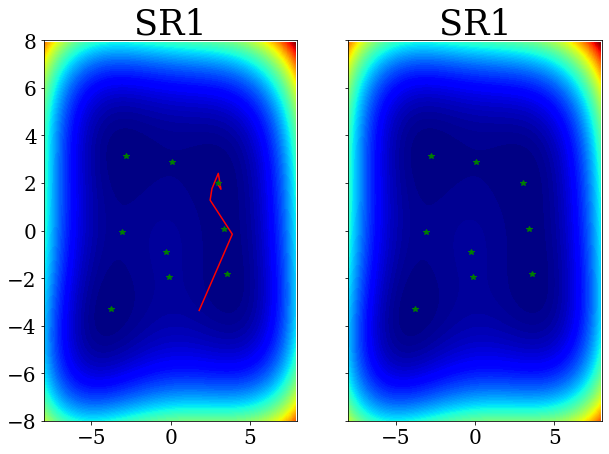

In [82]:
# definir set de pasos tomados para llegar al optimo
optima_x = return_appropriate_result_column(result_sr1) #Resultados de SR1 aplicados a la funcion

method = 'SR1'
fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,7))
for ax, zord in zip(axes, [1,-1]):
    # crear un gráfico de contorno lleno con 100 niveles y un esquema de color jet
    ax.contourf(x, y, results, levels=100, cmap='jet')
    ax.autoscale(False) # Para evitar que cambios de límite    
    ax.plot(optima_x[0], optima_x[1], zorder=zord, color='red')
    ax.plot(3, 2, '*', color='green') # Punto de optimos 1
    ax.plot(3.3851, 0.0738, '*', color='green') # Punto de optimos 2
    ax.plot(-3.0730, -0.0813, '*', color='green') # Punto de optimos 3
    ax.plot(-0.2708, -0.9230, '*', color='green') # Punto de optimos 4
    ax.plot(-0.1279, -1.9537, '*', color='green') # Punto de optimos 5
    ax.plot(0.0866, 2.8842, '*', color='green') # Punto de optimos 6
    ax.plot(3.5844, -1.8481, '*', color='green') # Punto de optimos 7
    ax.plot(-2.8051, 3.1313, '*', color='green') # Punto de optimos 8
    ax.plot(-3.7793, -3.2831, '*', color='green') # Punto de optimos 9
    ax.set_title('Método {0}'.format(method), fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    ax.set_xlim(r_min, r_max)
    ax.set_ylim(r_min, r_max)

### Metodo de Newton

In [55]:
def hessian_function(x):
    '''
    Predefinir el hessiano de la funcion.
    '''
    return np.array([[12*x[0]**2+4*x[1]-42, 4*x[0]+4*x[1]], 
                     [4*x[0]+4*x[1],        12*x[1]**2+4*x[0]-26]])


def metodo_newton(f, fprime, hessian,
                  x0, maxiter=5000, epsi=10e-2):
    '''
    Implementacion del metodo de Newton-Raphson.
    '''
    
    k = 0 # Iniciar conteo de iteraciones
    gfk = fprime(x0) #jacobiano
    Hk = hessian(x0) #hessiano
    xk = x0
    xk_vect = [xk]
    S = np.linalg.inv(Hk) # Direccion de busqueda

    while ln.norm(gfk) > epsi and k < maxiter:
        
        xk = xk - np.dot(S, gfk)
        k+=1
        xk_vect.append(xk)
        gfk = fprime(xk)
        Hk = hessian(xk)
        S = np.linalg.inv(Hk)

    return xk_vect, k, ln.norm(gfk)

punto_inicial = np.array([1.80, -3.36])
#punto_inicial = np.array([2,2]) #set de puntos iniciales
result_newton, k_newton, norma_newton = metodo_newton(f, f1, hessian_function, punto_inicial)



print('Resultado del metodo de Newton:')
print('Resultado final (minimizacion): %s' % (result_newton[-1]))
print('Conteo de iteraciones: %s' % (k_newton))
print('Norma obtenida en Newton: %s' % (norma_newton))

Resultado del metodo de Newton:
Resultado final (minimizacion): [-3.77931105 -3.28318631]
Conteo de iteraciones: 7
Norma obtenida en Newton: 8.406293507033198e-05


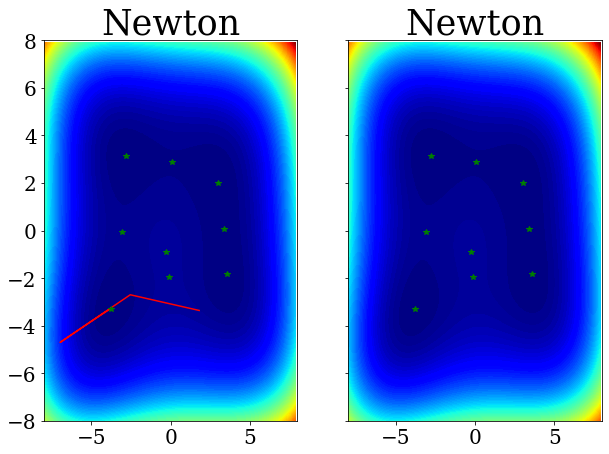

In [84]:
optima_x = return_appropriate_result_column(result_newton) #Resultados de Newton aplicados a la funcion

method = 'Newton'
fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,7))
for ax, zord in zip(axes, [1,-1]):
    # crear un gráfico de contorno lleno con 100 niveles y un esquema de color jet
    ax.contourf(x, y, results, levels=100, cmap='jet')
    ax.autoscale(False) # Para evitar que cambios de límite    
    ax.plot(optima_x[0], optima_x[1], zorder=zord, color='red')
    ax.plot(3, 2, '*', color='green') # Punto de optimos 1
    ax.plot(3.3851, 0.0738, '*', color='green') # Punto de optimos 2
    ax.plot(-3.0730, -0.0813, '*', color='green') # Punto de optimos 3
    ax.plot(-0.2708, -0.9230, '*', color='green') # Punto de optimos 4
    ax.plot(-0.1279, -1.9537, '*', color='green') # Punto de optimos 5
    ax.plot(0.0866, 2.8842, '*', color='green') # Punto de optimos 6
    ax.plot(3.5844, -1.8481, '*', color='green') # Punto de optimos 7
    ax.plot(-2.8051, 3.1313, '*', color='green') # Punto de optimos 8
    ax.plot(-3.7793, -3.2831, '*', color='green') # Punto de optimos 9
    ax.set_title('Método {0}'.format(method), fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    ax.set_xlim(r_min, r_max)
    ax.set_ylim(r_min, r_max)

Este metodo es mas sensible al punto inicial que los demas metodos. Se observa como el metodo se acerca a otro de los minimos validos, sin converger al nivel indicado (epsilon) luego de 5,000 iteraciones.

### Metodo de descenso de gradiente

In [57]:
def metodo_gradient_descent(f, fprime, x0,
                            maxiter=5000, epsi=10e-3):
    '''
    Implementacion del metodo del maximo descenso.
    '''
    k = 0 # Iniciar conteo de iteraciones
    gfk = fprime(x0)
    xk = x0
    xk_vect = [xk]
    alpha = 0.01 #alpha busqueda de linea fijo
    while ln.norm(gfk) > epsi and k < maxiter:
        xk = xk - alpha * gfk
        k+=1
        xk_vect.append(xk)
        gfk = fprime(xk)
    return xk_vect, k, ln.norm(gfk)

punto_inicial = np.array([1.80, -3.36])
#punto_inicial = np.array([-6,0])
result_GD, k_GD, norma_gd = metodo_gradient_descent(f, f1, punto_inicial)

print('Resultado del metodo de GD:')
print('Resultado final (minimizacion): %s' % (result_GD[-1]))
print('Conteo de iteraciones: %s' % (k_GD))
print('Norma obtenida en Gradient Descent: %s' % (norma_gd))

Resultado del metodo de GD:
Resultado final (minimizacion): [ 3.58445264 -1.84839276]
Conteo de iteraciones: 21
Norma obtenida en Gradient Descent: 0.007671901686314667


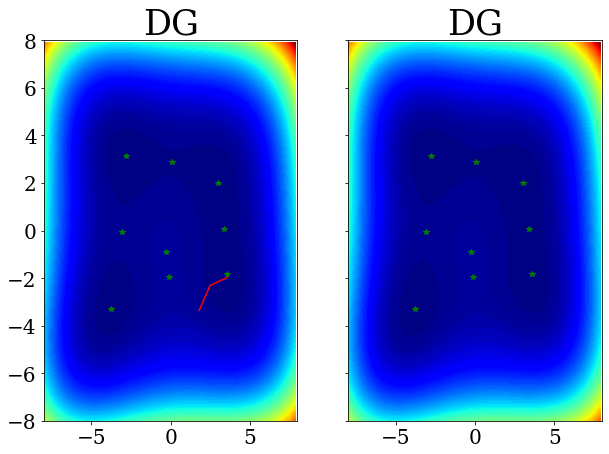

In [88]:
optima_x = return_appropriate_result_column(result_GD) #Resultados de GD aplicados a la funcion

method = 'Descenso de Gradiente'
fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,7))
for ax, zord in zip(axes, [1,-1]):
    # crear un gráfico de contorno lleno con 100 niveles y un esquema de color jet
    ax.contourf(x, y, results, levels=100, cmap='jet')
    ax.autoscale(False) # Para evitar que cambios de límite
    ax.plot(optima_x[0], optima_x[1], zorder=zord, color='red')
    ax.plot(3, 2, '*', color='green') # Punto de optimos 1
    ax.plot(3.3851, 0.0738, '*', color='green') # Punto de optimos 2
    ax.plot(-3.0730, -0.0813, '*', color='green') # Punto de optimos 3
    ax.plot(-0.2708, -0.9230, '*', color='green') # Punto de optimos 4
    ax.plot(-0.1279, -1.9537, '*', color='green') # Punto de optimos 5
    ax.plot(0.0866, 2.8842, '*', color='green') # Punto de optimos 6
    ax.plot(3.5844, -1.8481, '*', color='green') # Punto de optimos 7
    ax.plot(-2.8051, 3.1313, '*', color='green') # Punto de optimos 8
    ax.plot(-3.7793, -3.2831, '*', color='green') # Punto de optimos 9
    ax.set_title('Método {0}'.format(method), fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    ax.set_xlim(r_min, r_max, )
    ax.set_ylim(r_min, r_max)

A este metodo le cuesta mucho mas lograr converger al mismo nivel de epsilon indicado, ademas de ser sensible al punto inicial.

# Aplicaciones en redes neuronales

Introduccion al problema de clasificacion del dataset `cifar`: https://www.cs.toronto.edu/~kriz/cifar.html.

Primero probamos con `Adam`.
Consultado el workaround de la aplicacion de L-BFGS con `TensorFlow  Probability`: https://pychao.com/2019/11/02/optimize-tensorflow-keras-models-with-l-bfgs-from-tensorflow-probability/

In [59]:
#https://marcinbogdanski.github.io/ai-sketchpad/KerasNN/1100_CNN_CIFAR10.html

# import tensorflow as tf
# from tensorflow.keras.datasets import cifar10
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, InputLayer
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# import tensorflow.keras.layers as tfl

In [60]:
#from google.colab import drive
#drive.mount('/content/drive') #conectar google drive
#import h5py

# define location of dataset
#file1 = '/content/drive/MyDrive/INTEC/Data Tesis/Train'
#file2 = '/content/drive/MyDrive/INTEC/Data Tesis/test_signs.h5'

#X_train_orig = h5py.File(file1, mode='r')

In [ ]:
# (x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.cifar10.load_data()
# class2txt = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# fig, axes = plt.subplots(nrows=1, ncols=6, figsize=[16, 9])
# for i in range(len(axes)):
#     axes[i].set_title(class2txt[y_train_raw[i, 0]]) #mostrar el titulo del tag
#     axes[i].imshow(x_train_raw[i]) #mostrar la foto de la clase 

In [ ]:
# #Normalizar entradas
# x_train = (x_train_raw - x_train_raw.mean()) / x_train_raw.std()
# x_test = (x_test_raw - x_train_raw.mean()) / x_train_raw.std()

# #One-Hot Encoding
# y_train = tf.keras.utils.to_categorical(y_train_raw, num_classes=10)
# y_test = tf.keras.utils.to_categorical(y_test_raw, num_classes=10)
# print('y_train.shape', y_train.shape)
# print(y_train[:3])

In [ ]:
# X_input = Input(shape=[32, 32, 3])

# X = Conv2D(filters=16, kernel_size=3, padding='same', activation='elu')(X_input)
# X = MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same')(X)

# X = Conv2D(filters=32, kernel_size=3, padding='same', activation='elu')(X)
# X = MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same')(X)

# X = Conv2D(filters=64, kernel_size=3, padding='same', activation='elu')(X)
# X = MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same')(X)

# X = Flatten()(X)
# X = Dropout(0.2)(X)

# X = Dense(512, activation='elu')(X)
# X = Dropout(0.2)(X)

# X = Dense(10, activation='softmax')(X)

# model = tf.keras.Model(inputs=X_input, outputs=X)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [ ]:
# #Entrenar modelo con Adam
# hist = model.fit(x=x_train, y=y_train, batch_size=250,
#                  epochs=100, validation_data=(x_test, y_test), verbose=2)

In [ ]:
# #imprimir loss y accuracy
# loss, acc = model.evaluate(x_train, y_train, batch_size=250, verbose=0)
# print(f'Accuracy on train set: {acc:.3f}')
# loss, acc = model.evaluate(x_test, y_test, batch_size=250, verbose=0)
# print(f'Accuracy on test set:  {acc:.3f}')

# #imprimir resultados
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[16, 6])
# axes[0].plot(hist.history['loss'], label='train_loss')
# axes[0].plot(hist.history['val_loss'], label='val_loss')
# axes[0].set_title('Perdida')
# axes[0].legend()
# axes[1].plot(hist.history['accuracy'], label='train_acc')
# axes[1].plot(hist.history['val_accuracy'], label='val_acc')
# axes[1].set_title('Precision')
# axes[1].legend()

#Vemos que hay un problema de overfitting ya que el modelo no generaliza en el validation set.

## MNIST Dataset

In [66]:
#!pip install tensorflow
# keras imports for the dataset and building our neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from keras.datasets import mnist 

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# Flattening the images from the 28x28 pixels to 1D 787 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# looking at the model summary
model.summary()

11490434/11490434 [==============================] - 0s 0us/step
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [67]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam') #SGD / RMSprop / Adadelta / Adagrad / Adam / Adamax / Ftrl / Nadam
# training the model for 100 epochs
hist = model.fit(X_train, Y_train, batch_size=1000, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
60/60 [==============================] - 2s 18ms/step - loss: 0.8245 - accuracy: 0.7847 - val_loss: 0.3672 - val_accuracy: 0.9032
Epoch 2/100
60/60 [==============================] - 1s 16ms/step - loss: 0.3256 - accuracy: 0.9108 - val_loss: 0.2797 - val_accuracy: 0.9227
Epoch 3/100
60/60 [==============================] - 1s 15ms/step - loss: 0.2628 - accuracy: 0.9268 - val_loss: 0.2369 - val_accuracy: 0.9338
Epoch 4/100
60/60 [==============================] - 1s 15ms/step - loss: 0.2275 - accuracy: 0.9376 - val_loss: 0.2120 - val_accuracy: 0.9431
Epoch 5/100
60/60 [==============================] - 1s 16ms/step - loss: 0.2016 - accuracy: 0.9441 - val_loss: 0.1903 - val_accuracy: 0.9465
Epoch 6/100
60/60 [==============================] - 1s 15ms/step - loss: 0.1821 - accuracy: 0.9490 - val_loss: 0.1759 - val_accuracy: 0.9503
Epoch 7/100
60/60 [==============================] - 1s 15ms/step - loss: 0.1649 - accuracy: 0.9538 - val_loss: 0.1625 - val_accuracy: 0.9545
Epoch 

## Graficos de validacion: Adam



Loss on train set: 0.2582
Loss on test set:  0.2522


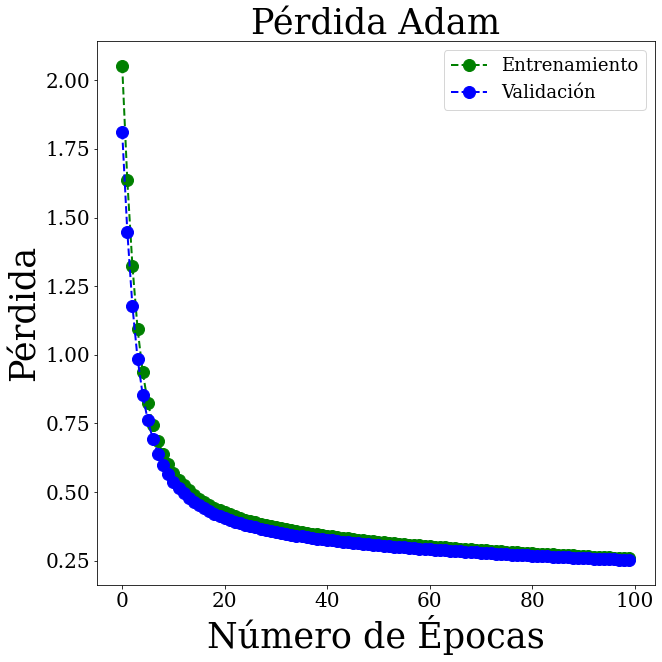

In [76]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 18})
plt.rc('font', family='serif')
plt.style.use('seaborn-muted')

#imprimir loss y accuracy
loss, acc = model.evaluate(X_train, Y_train, batch_size=1000, verbose=0)
print(f'Loss on train set: {loss:.4f}')
loss, acc = model.evaluate(X_test, Y_test, batch_size=1000, verbose=0)
print(f'Loss on test set:  {loss:.4f}')

maxiter=100 # Maximo numero de iteraciones establecido anteriormente

plt.subplots(figsize = (10, 10))
plt.plot(hist.history['loss'],
         color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(hist.history['val_loss'],
         color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)

plt.yscale("linear")
plt.title('Pérdida Adam', fontsize=35)
plt.ylabel('Pérdida', fontsize=35)
plt.xlabel('Número de Épocas', fontsize=35)
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

Accuracy on train set: 0.9280
Accuracy on test set:  0.9302


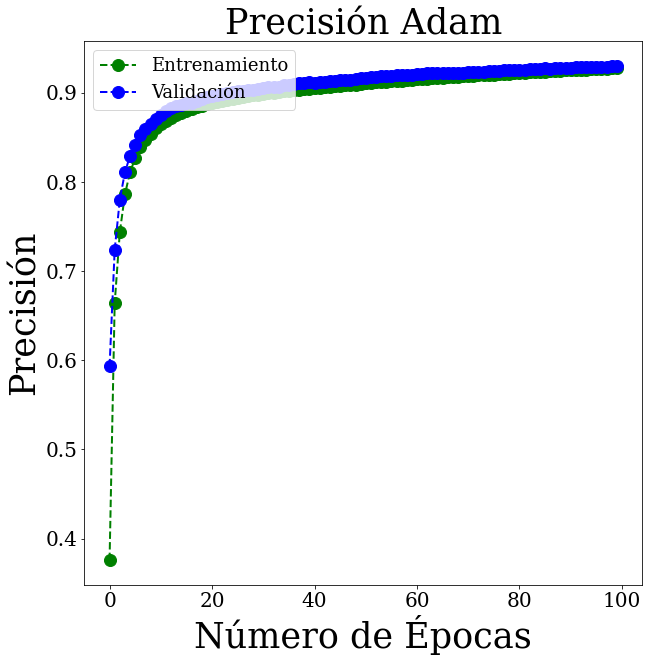

In [77]:
#imprimir loss y accuracy
loss, acc = model.evaluate(X_train, Y_train, batch_size=1000, verbose=0)
print(f'Accuracy on train set: {acc:.4f}')
loss, acc = model.evaluate(X_test, Y_test, batch_size=1000, verbose=0)
print(f'Accuracy on test set:  {acc:.4f}')

plt.subplots(figsize = (10, 10))
plt.plot(hist.history['accuracy'],
         color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(hist.history['val_accuracy'],
         color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.yscale("linear")
plt.title('Precisión Adam', fontsize=35)
plt.ylabel('Precisión', fontsize=35)
plt.xlabel('Número de Épocas', fontsize=35)
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

## Graficos de validacion: SGD

In [70]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [71]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='SGD') #SGD / RMSprop / Adadelta / Adagrad / Adam / Adamax / Ftrl / Nadam
# training the model for 100 epochs
hist = model.fit(X_train, Y_train, batch_size=1000, epochs=100, validation_data=(X_test, Y_test) )

Epoch 1/100
60/60 [==============================] - 1s 18ms/step - loss: 2.0525 - accuracy: 0.3760 - val_loss: 1.8114 - val_accuracy: 0.5933
Epoch 2/100
60/60 [==============================] - 1s 16ms/step - loss: 1.6355 - accuracy: 0.6638 - val_loss: 1.4488 - val_accuracy: 0.7239
Epoch 3/100
60/60 [==============================] - 1s 15ms/step - loss: 1.3231 - accuracy: 0.7436 - val_loss: 1.1766 - val_accuracy: 0.7801
Epoch 4/100
60/60 [==============================] - 2s 27ms/step - loss: 1.0958 - accuracy: 0.7862 - val_loss: 0.9862 - val_accuracy: 0.8110
Epoch 5/100
60/60 [==============================] - 1s 18ms/step - loss: 0.9375 - accuracy: 0.8110 - val_loss: 0.8545 - val_accuracy: 0.8293
Epoch 6/100
60/60 [==============================] - 1s 15ms/step - loss: 0.8262 - accuracy: 0.8266 - val_loss: 0.7610 - val_accuracy: 0.8417
Epoch 7/100
60/60 [==============================] - 1s 15ms/step - loss: 0.7456 - accuracy: 0.8388 - val_loss: 0.6923 - val_accuracy: 0.8531
Epoch 

Loss on train set: 0.2582
Loss on test set:  0.2522


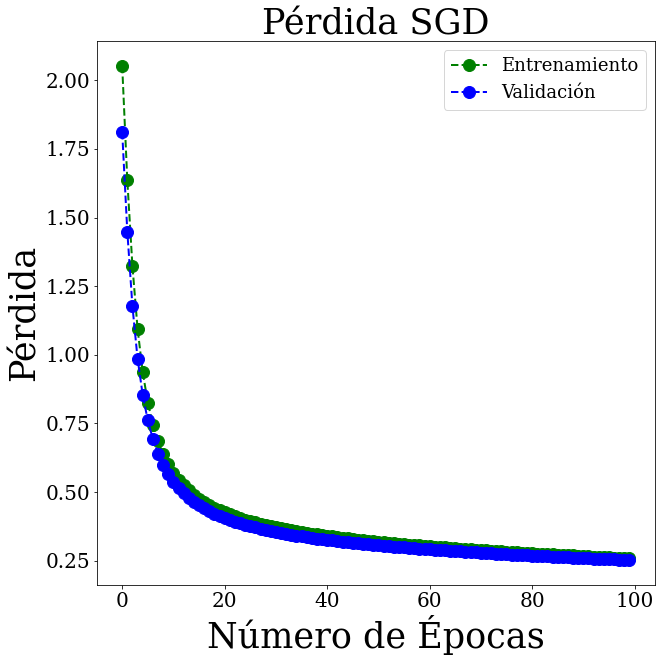

In [74]:
#imprimir loss y accuracy
loss, acc = model.evaluate(X_train, Y_train, batch_size=1000, verbose=0)
print(f'Loss on train set: {loss:.4f}')
loss, acc = model.evaluate(X_test, Y_test, batch_size=1000, verbose=0)
print(f'Loss on test set:  {loss:.4f}')

maxiter=100 # Maximo numero de iteraciones establecido anteriormente

plt.subplots(figsize = (10, 10))
plt.plot(hist.history['loss'],
         color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(hist.history['val_loss'],
         color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)

plt.yscale("linear")
plt.title('Pérdida SGD', fontsize=35)
plt.ylabel('Pérdida', fontsize=35)
plt.xlabel('Número de Épocas', fontsize=35)
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

Accuracy on train set: 0.9280
Accuracy on test set:  0.9302


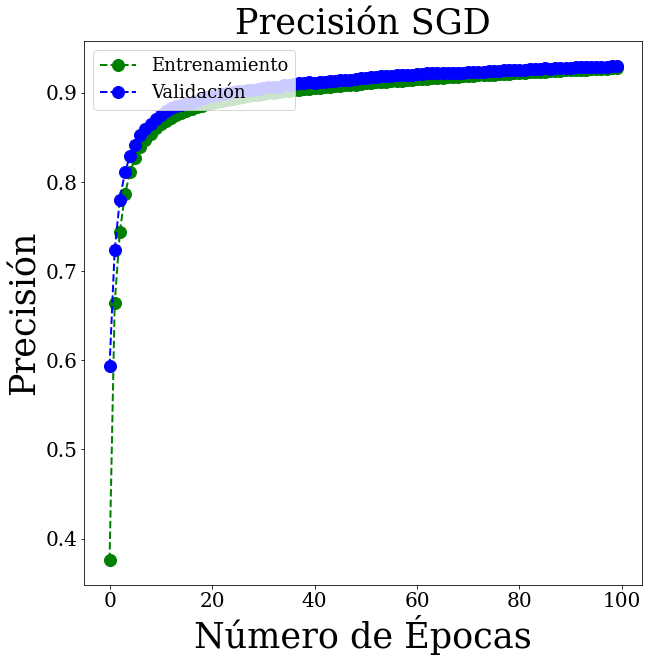

In [75]:
#imprimir loss y accuracy
loss, acc = model.evaluate(X_train, Y_train, batch_size=1000, verbose=0)
print(f'Accuracy on train set: {acc:.4f}')
loss, acc = model.evaluate(X_test, Y_test, batch_size=1000, verbose=0)
print(f'Accuracy on test set:  {acc:.4f}')

plt.subplots(figsize = (10, 10))
plt.plot(hist.history['accuracy'],
         color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(hist.history['val_accuracy'],
         color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.yscale("linear")
plt.title('Precisión SGD', fontsize=35)
plt.ylabel('Precisión', fontsize=35)
plt.xlabel('Número de Épocas', fontsize=35)
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)